In [37]:
#ÌïÑÏöîÌïú Î™®Îìà ÏûÑÌè¨Ìä∏ÌïòÍ∏∞
import pandas as pd
from pandas import DataFrame  as df
import numpy as np
from collections import Counter
from konlpy.tag import Okt
okt = Okt()
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import gensim
#!pip uninstall gensim
#!pip install gensim==3.8.3
from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.models import Word2Vec
from gensim.models.ldamodel import LdaModel
from gensim.models.wrappers import LdaMallet
from wordcloud import WordCloud
from datetime import datetime
import json
import os
import wordcloud
from wordcloud import WordCloud, STOPWORDS


In [3]:
#os.environ['MALLET_HOME'] = 'mallet-2.0.8'

In [21]:

with open('final.json', 'r', encoding='UTF-8') as f:    # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
    Data = json.load(f)                            # json_data Î≥ÄÏàòÏóê ÎÑ£Í∏∞


In [22]:
Data

{'schema': {'fields': [{'name': 'index', 'type': 'integer'},
   {'name': 'date', 'type': 'string'},
   {'name': 'utterance', 'type': 'string'}],
  'primaryKey': ['index'],
  'pandas_version': '0.20.0'},
 'data': [{'index': 0,
   'date': '2020-01-24',
   'utterance': 'ÌïúÍµ≠ÏóêÏÇ¨ ÎìúÍ∫ºÏö¥ ÎßàÏä§ÌÅ¨ ÎëêÍ∞ú ÏÇ¨ÏôîÎäîÎç∞'},
  {'index': 1, 'date': '2020-01-24', 'utterance': 'Í∏∞Ïπ®Ïù¥Îûë Í∑∏Îü∞Í±∏Î°ú'},
  {'index': 2, 'date': '2020-01-24', 'utterance': 'ÏòÆÎäîÎç∞'},
  {'index': 3, 'date': '2020-01-24', 'utterance': 'Í≥µÍ∏∞Ï§ë Ïπ®'},
  {'index': 4, 'date': '2020-01-24', 'utterance': 'Îì§Ïñ¥ÏôîÏùÑÎïú ÏùºÏºÄ Ïã¨Í∞Å ÏïàÌï¥ÏÑú'},
  {'index': 5, 'date': '2020-01-24', 'utterance': 'ÎãπÏùº ÎãπÏùº ÌèêÏá†ÎêòÍ±∞ ÏûàÏñ¥'},
  {'index': 6, 'date': '2020-01-24', 'utterance': 'Ïñ¥Ï††Í∞Ä ÏóáÍ∑∏Ï†ú Ïö∞Ìïú ÎèÑÏãú ÌèêÏá†'},
  {'index': 7, 'date': '2020-01-24', 'utterance': 'Ïñ¥Ï†ú 8Í∞ú ÎèÑÏãú ÌôïÎåÄ ÌèêÏá†'},
  {'index': 8, 'date': '2020-01-24', 'utterance': 'Ïò§Îäò ÏÉÅÌï¥ Í¥ÄÍ¥ëÏßÄ Îã§ ÌèêÏá† ÎêêÎÑ§'},
  {'

In [23]:

Data = pd.json_normalize(Data['data'][:])
#test1 = json_data1.head(30)


In [24]:
Data

index        date             utterance
0              0  2020-01-24  ÌïúÍµ≠ÏóêÏÇ¨ ÎìúÍ∫ºÏö¥ ÎßàÏä§ÌÅ¨ ÎëêÍ∞ú ÏÇ¨ÏôîÎäîÎç∞
1              1  2020-01-24             Í∏∞Ïπ®Ïù¥Îûë Í∑∏Îü∞Í±∏Î°ú
2              2  2020-01-24                   ÏòÆÎäîÎç∞
3              3  2020-01-24                 Í≥µÍ∏∞Ï§ë Ïπ®
4              4  2020-01-24       Îì§Ïñ¥ÏôîÏùÑÎïú ÏùºÏºÄ Ïã¨Í∞Å ÏïàÌï¥ÏÑú
...          ...         ...                   ...
1116382  1116382  2020-03-18  „Öá„Öá Î≠ê ÏòÅÏñ¥ÎèÑÏïÑÎãàÍ≥†,, Ìè¥ÎûÄÎìú,,?
1116383  1116383  2020-03-18      ÏïÑÎãà Í∏∞ÏñµÏïàÎÇò ÏïÑÎ¨¥Ìäº Ïô∏Íµ≠Ïñ¥Îûò
1116384  1116384  2020-03-18     ÎãπÏó∞Ìûà ÌïúÏûêÎÇò ÌïúÍ∏ÄÏù∏Ï§Ñ ÏïåÏïòÎäîÎç∞
1116385  1116385  2020-03-18             Ïô∏ÎûòÏñ¥ ÏòÄÍµ∞Ïöî^^
1116386  1116386  2020-03-18    ÎÑ§ ÏÉÅÏãù ÌïòÎÇò ÏïåÎ†§ÎìúÎ†∏ÏäµÎãàÎã§ „Öé„Öé

[1116387 rows x 3 columns]

# ÏûÖÎ†• Î∞õÏùÄ Îã®Ïñ¥ÏôÄ Í∏∞Í∞ÑÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨

In [25]:
#keyword = 'ÏΩîÎ°úÎÇò'
start_year = 2020
start_month = 1
start_day = 24
finish_year = 2020
finish_month = 1
finish_day = 30


#Data = Data.loc[Data['text'].str.contains(keyword)]
#Data = Data.loc[Data['text'].str.contains('a|b')]


Data['date']= pd.to_datetime(Data["date"])
Data = Data[(Data.date >= datetime(start_year,start_month , start_day)) & (Data.date <= datetime(finish_year, finish_month, finish_day))]
Data.reset_index(drop=True, inplace=True)

Data

index       date                                          utterance
0           0 2020-01-24                               ÌïúÍµ≠ÏóêÏÇ¨ ÎìúÍ∫ºÏö¥ ÎßàÏä§ÌÅ¨ ÎëêÍ∞ú ÏÇ¨ÏôîÎäîÎç∞
1           1 2020-01-24                                          Í∏∞Ïπ®Ïù¥Îûë Í∑∏Îü∞Í±∏Î°ú
2           2 2020-01-24                                                ÏòÆÎäîÎç∞
3           3 2020-01-24                                              Í≥µÍ∏∞Ï§ë Ïπ®
4           4 2020-01-24                                    Îì§Ïñ¥ÏôîÏùÑÎïú ÏùºÏºÄ Ïã¨Í∞Å ÏïàÌï¥ÏÑú
...       ...        ...                                                ...
5346  1112818 2020-01-30                                 Í±∞Í∏∞ Îã¥Ïóê Í∞ÄÏãúÎ©¥ Í∞ú ÏûàÎÇò Î¥êÏ§òÏöî
5347  1112819 2020-01-30                                         Ï†Ä Í∞ú Î™ª Î≥¥Í≥† Ïò¥
5348  1112820 2020-01-30                                   ÌïòÏßÄÎßå Îã§Î•∏ Í≥≥„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã
5349  1112821 2020-01-30                                      Í∑∏ Ïπ¥ÌéòÏóê Í∞ú ÏûàÎÇò?„Öã„Öã
5350  1112822 2020-01-30  Í∞ú ÌïòÎãàÍπå #@Ïù¥Î¶Ñ#Ïù¥ ÏÑ§Ïóê Ïö∞Î¶¨ Ïô∏Í∞ìÏßë Í∞îÎäîÎç∞ Í∞ú Ï≤òÏùå Î≥¥Í≥† ÏûêÍæ∏ ÎßåÏßàÎùº Ïπ¥Îçò Í±∞...

[5351 rows x 3 columns]

# ÏùºÏûê Î≥Ñ Ìä∏Ïúó Ïàò 

In [26]:
element_count = {}

for item in Data['date']:
    element_count.setdefault(item,0)
    element_count[item] += 1
    
tweet_count = pd.DataFrame.from_dict(element_count, orient = 'index',columns=["tweet_count"])
tweet_count

tweet_count
2020-01-24          232
2020-01-28         1638
2020-01-27          426
2020-01-25          426
2020-01-29          802
2020-01-26          437
2020-01-30         1390

In [10]:
Data.text = Data.utterance.astype(str)
clean_Data =Data
clean_Data ['utterance'] = clean_Data ['utterance'].str.replace('[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]',' ',regex=True)
clean_Data  = clean_Data .replace({'': np.nan})
clean_Data  = clean_Data .replace(r'^\s*$', None, regex=True)
#clean_Data.dropna(how='any', inplace=True)
clean_Data = clean_Data.reset_index (drop = True)
print(clean_Data.isnull().values.any()) 




Data_list=clean_Data.utterance.values.tolist()
data_word=[]
for i in range(len(Data_list)):
    try:
        data_word.append(okt.nouns(Data_list[i]))
    except Exception as e:
        continue
Data['clean'] = data_word

<ipython-input-10-07fb866d5c1e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Data.text = Data.utterance.astype(str)
<ipython-input-10-07fb866d5c1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_Data ['utterance'] = clean_Data ['utterance'].str.replace('[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]',' ',regex=True)
C:\Users\BoungLee\anaconda3\lib\site-packages\pandas\core\missing.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


False


<ipython-input-10-07fb866d5c1e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['clean'] = data_word


In [27]:
Data_list=clean_Data.utterance.values.tolist()

#Î¶¨Ïä§Ìä∏Î•º ÏöîÏÜåÎ≥ÑÎ°ú(Ìä∏Ïúó ÌïòÎÇò) Í∞ÄÏ†∏ÏôÄÏÑú Î™ÖÏÇ¨Îßå Ï∂îÏ∂úÌïú ÌõÑ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
data_word=[]
for i in range(len(Data_list)):
    try:
        data_word.append(okt.nouns(Data_list[i]))
    except Exception as e:
        continue

#Ìä∏ÏúóÏóêÏÑú Î™ÖÏÇ¨Îßå Ï∂îÏ∂úÌï¥ÏÑú ÎßåÎì† Î¶¨Ïä§Ìä∏
data_word

[['ÌïúÍµ≠', 'ÏÇ¨', 'ÎìúÍ∫ºÏö¥', 'ÎßàÏä§ÌÅ¨', 'Í∞ú'],
 ['Í∏∞Ïπ®', 'Í±∏'],
 ['ÏòÆÎäîÎç∞'],
 ['Í≥µÍ∏∞', 'Ïπ®'],
 ['Îïú', 'ÏùºÏºÄ', 'Ïã¨Í∞Å', 'ÏïàÌï¥'],
 ['ÎãπÏùº', 'ÎãπÏùº', 'ÌèêÏá†'],
 ['Ïñ¥Ï††', 'ÏóáÍ∑∏Ï†ú', 'Ïö∞Ìïú', 'ÎèÑÏãú', 'ÌèêÏá†'],
 ['Ïñ¥Ï†ú', 'Í∞ú', 'ÎèÑÏãú', 'ÌôïÎåÄ', 'ÌèêÏá†'],
 ['Ïò§Îäò', 'ÏÉÅÌï¥', 'Í¥ÄÍ¥ëÏßÄ', 'ÌèêÏá†'],
 ['Í∏¥Í∏â'],
 ['ÎåÄÎ∞ï'],
 ['ÏïÑÏòà', 'ÏïàÎ∞ñÎ™ª'],
 ['ÎØ∏Í∞Ä', 'Îä•', 'ÏÇ¨Îûå', 'Ïñ¥ÏºÄ'],
 ['ÏÉÅÌï¥', 'Í¥ÄÍ¥ë', 'Ïñ¥Îäò', 'Í∏¥Í∏â'],
 ['Î∞úÌëú', 'ÎêúÍ±∞'],
 [],
 ['Í∏∞Ï∞®', 'ÏßÄÌïòÏ≤†'],
 ['Î±ÖÍ∏∞'],
 [],
 ['ÌÜµÏ†ú', 'Ïïà'],
 ['Ï§ëÍµ≠'],
 [],
 [],
 ['ÏßÑÏßú'],
 ['Í±±Ï†ï', 'ÎßêÏûÑ'],
 ['ÏßÑÏßú'],
 ['Í±±Ï†ï'],
 ['ÏùÄ'],
 ['Í∏∞ÏÇ¨'],
 ['Ïò§ÌÉÄ'],
 [],
 ['Ïã±Í∞ÄÌè¥'],
 ['Ïùè', 'Í∏∞Î©¥'],
 ['ÌÉúÍµ≠'],
 ['ÎØ∏Íµ≠'],
 ['ÌïúÍµ≠'],
 ['ÏïÑ'],
 ['Ïâ¨ÌéÑ', 'ÏÑ∏Í≥Ñ'],
 [],
 ['ÌïòÏó¨Ìäº', 'ÏàòÏñ¥', 'Í≥µÎ∂Ä'],
 ['ÎÇú'],
 ['Í≥µÎ∂Ä'],
 ['ÌòºÏûê'],
 ['ÎèàÏïà'],
 ['Ïä§ÌÑ∞Îîî', 'ÏßÑÏßú'],
 ['Ïä§ÌÑ∞Îîî', 'Í∞ÄÌã∞', 'Ïüà'],
 ['ÏõÖ'],
 ['ÏïÑÌÅ¨Î°úÎ∞îÌã±', 'Í¥Ä', 'ÌîÑÎûëÏä§Ïñ¥'],
 

In [28]:
gensim.__version__

'3.8.3'

In [29]:
os.environ['MALLET_HOME'] = 'mallet-2.0.8'

id2word=corpora.Dictionary(data_word)
id2word.filter_extremes(no_below = 20) #20Ìöå Ïù¥ÌïòÎ°ú Îì±Ïû•Ìïú Îã®Ïñ¥Îäî ÏÇ≠Ï†ú
texts = data_word
corpus=[id2word.doc2bow(text) for text in texts]

mallet_path = 'mallet-2.0.8/bin/mallet' 
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)


ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [30]:


id2word=corpora.Dictionary(data_word)
id2word.filter_extremes(no_below = 20)
texts = data_word
corpus=[id2word.doc2bow(text) for text in texts]

mallet_path = r'C:\Users\BoungLee\AppData\Local\Temp\mallet\bin\mallet' 
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()


def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=21, step=2)

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)







In [31]:


limit=21; start=4; step=2;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1

        
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)
#print(optimal_model.print_topics(num_words=10))








def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_modelÏóê corpusÎ•º ÎÑ£Ïñ¥ Í∞Å ÌÜ†ÌîΩ Îãπ ÌôïÎ•†ÏùÑ Ïïå Ïàò ÏûàÏùå
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=10)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, Data['utterance'],Data['date']], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=Data_list)

# Format
df_topic_tweet = df_topic_sents_keywords.reset_index()
df_topic_tweet.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'utterance','date']

# ShowÍ∞Å Î¨∏ÏÑúÏóê ÎåÄÌïú ÌÜ†ÌîΩ
#df_dominant_topic=df_dominant_topic.sort_values(by=['Dominant_Topic'])
#df_topic_tweet


Num Topics = 4  has Coherence Value of 0.564773673369682
Num Topics = 6  has Coherence Value of 0.6136988014023357
Num Topics = 8  has Coherence Value of 0.6068051630648481
Num Topics = 10  has Coherence Value of 0.6094174992966115
Num Topics = 12  has Coherence Value of 0.6073898450388944
Num Topics = 14  has Coherence Value of 0.6083773751874095
Num Topics = 16  has Coherence Value of 0.6091188084459818
<class 'pandas.core.frame.DataFrame'>


In [32]:

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "utterance", "date","Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num","Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_tweet['Dominant_Topic'] =df_topic_tweet['Dominant_Topic'] +1
df_topic_tweet.Dominant_Topic = df_topic_tweet.Dominant_Topic.astype(str)
df_topic_tweet['Dominant_Topic'] =df_topic_tweet['Dominant_Topic'].str.split('.').str[0]
 

In [40]:
lda_inform.to_csv ("lda_inform.csv", index = None)
lda_inform

Topic_Num                              Keywords  Num_Documents  \
0.0         1     ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ           3341   
1.0         2      Í±∞, ÎÇ¥, Í∑∏Í±∞, Ïï†, Í≥µÎ∂Ä, Ï†Ä, Îç∞, Ìï®, ÎåÄÎ∞ï, ÏùºÎã®            330   
2.0         3  ÎßàÏä§ÌÅ¨, Ïö∞Ìïú, Îçî, Í∞ú, ÌïúÍµ≠, ÌèêÎ†¥, Ï∑®ÏÜå, ÏûÑ, Ìñá, ÏΩîÎ°úÎÇò            290   
3.0         4  Î™Ö, Ïò§Îäò, ÏßÑÏûê, Ìôï, Ï§ëÍµ≠Ïù∏, ÏàòÏóÖ, ÏãúÍ∞Ñ, Í∑∏ÎÉ•, Ïù¥Ï†ú, Ïò§            260   
4.0         5     ÏßÑÏßú, ÏßÄÍ∏à, Î≠ê, ÎÇú, Î¨∏Ï†ú, Ïùë, Í≥†ÎØº, Í±∞Í∏∞, Í∞ú, ÎÑà            316   
5.0         6      ÎÇò, Ï§ëÍµ≠, Ïôú, ÏÉùÍ∞Å, Ïïà, Ï¢Ä, ÏõÖ, Î∞ïÏ•ê, ÌïòÎÇò, Í≤É            312   
6.0         7  Ïö∞Î¶¨, Îòê, ÎÑà, Í∞êÏóº, Ïù¥Î™®Ìã∞ÏΩò, Ïßë, Ïù¥Î≤à, Ï§ë, Îâ¥Ïä§, ÏõêÎûò            226   
7.0         8    Ïù¥Î¶Ñ, ÏãúÏä§ÌÖú, ÏÇ¨ÏßÑ, Í∑∏, Ïù¥, Í∏∞ÌÉÄ, Ïôú, Ïßë, Ïù¥Î≤à, Îßê            276   

     Perc_Documents  
0.0          0.6244  
1.0          0.0617  
2.0          0.0542  
3.0          0.0486  
4.0          0.0591  
5.0          0.0583  
6.0          0.0422  
7.0          0.0516

In [41]:
for i in range(1,topic_num+1):
    globals()['df_{}'.format(i)]=df_topic_tweet.loc[df_topic_tweet.Dominant_Topic==str(i)]
    globals()['df_{}'.format(i)].sort_values('Topic_Perc_Contrib',ascending=False,inplace = True)
    globals()['df_{}'.format(i)].to_csv ("topic("+str(i)+")_tweet.csv", index = None)

df_1

<ipython-input-41-8f92c165e537>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()['df_{}'.format(i)].sort_values('Topic_Perc_Contrib',ascending=False,inplace = True)


Document_No Dominant_Topic  Topic_Perc_Contrib  \
3847         3847              1              0.3948   
5250         5250              1              0.2810   
2817         2817              1              0.1587   
741           741              1              0.1587   
2652         2652              1              0.1587   
...           ...            ...                 ...   
1866         1866              1              0.1250   
1867         1867              1              0.1250   
1868         1868              1              0.1250   
1870         1870              1              0.1250   
5348         5348              1              0.1250   

                               Keywords  \
3847  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
5250  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
2817  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
741   ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
2652  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
...                                 ...   
1866  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
1867  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
1868  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
1870  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   
5348  ÏÇ¨Îûå, Îïå, Îßê, Ïùº, Ïõî, Í≤É, ÎïåÎ¨∏, ÌïòÎÇò, Í±∞Í∏∞, ÏÇ¨ÏßÑ   

                                              utterance       date  
3847  -------------------------------------------- 1... 2020-01-30  
5250  AÏî®Îäî ÏßÄÎÇúÌï¥ 11Ïõî 25Ïùº Ïö∞ÌïúÏãúÏóêÏÑú Í∏∞Ïà†ÏûêÎ°ú ÏùºÏùÑ ÌïòÎã§ 1Ïõî 17Ïùº Í∑ÄÍµ≠ÌñàÍ≥†, ... 2020-01-28  
2817                                            ÏïÑ 2Ïõî 8Ïùº 2020-01-25  
741           Í∑∏Îüº UCLAÏóêÏÑú Ïù∏ÌÑ∞Î∑∞Ìïú ÏÇ¨ÎûåÏùÑ ÏïÑÏãúÏïÑÌûâÍ≥º Îã§Îãå ÏÇ¨ÎûåÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Í±∞Ïïº? 2020-01-26  
2652                ÏÇ¨Îûå ÎßéÏù¥ Î™∞Î†§ÏÑú ÏâΩÏßÑ ÏïäÏùÑ Í≤É Í∞ôÍ∏¥ÌïúÎç∞ Í∑∏ÎûòÎèÑ ÎèÑÏ†Ñ Î∂ÄÌÉÅ „Öã„Öã 2020-01-28  
...                                                 ...        ...  
1866                                        ÏÇ¨Ïã§ ÏïàÏì∞Îäî Íµ¨Ïñ¥Ï≤¥Îùº 2020-01-30  
1867                                               ÌïòÏò§Ï≤¥Îäî 2020-01-30  
1868                                              Îã§Î•∏Í±¥Í∞Ä? 2020-01-30  
1870                                         ÏïÑÏò§ ÎÅùÎÇúÏ§ÑÏïåÏïòÎäîÎç∞ 2020-01-25  
5348                                   ÌïòÏßÄÎßå Îã§Î•∏ Í≥≥„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã 2020-01-30  

[3341 rows x 6 columns]

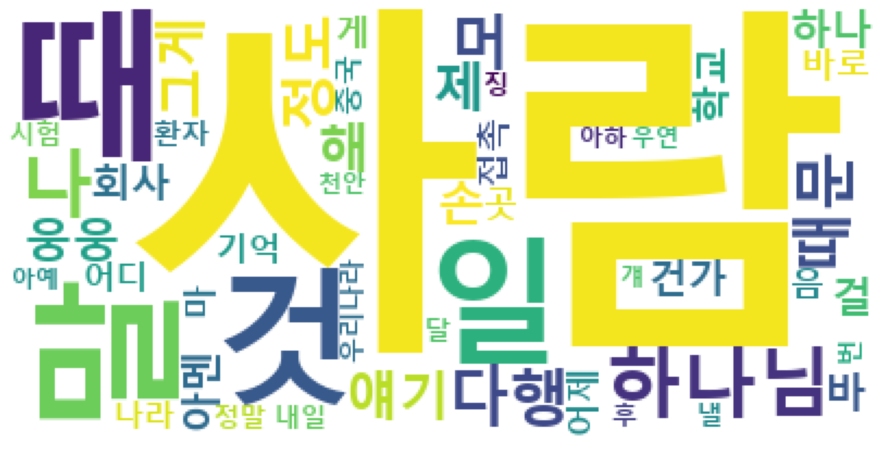

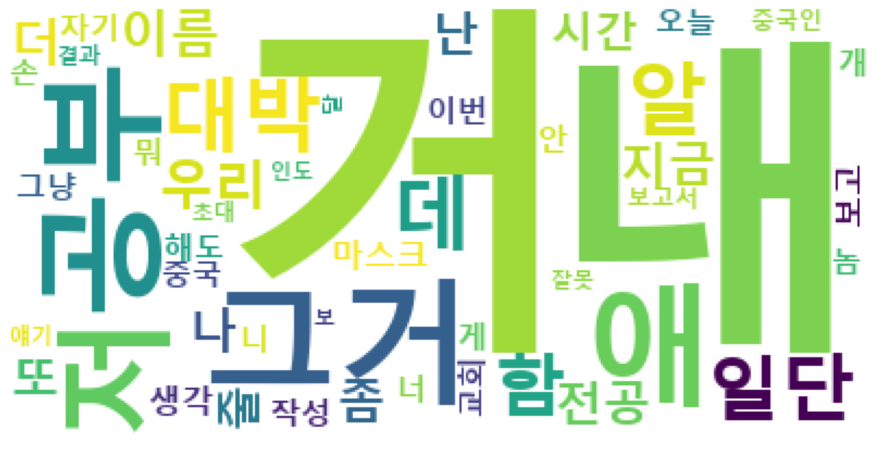

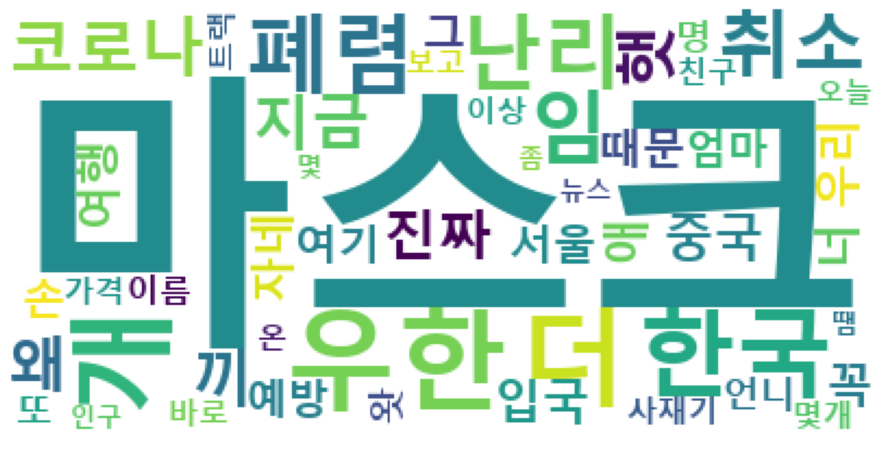

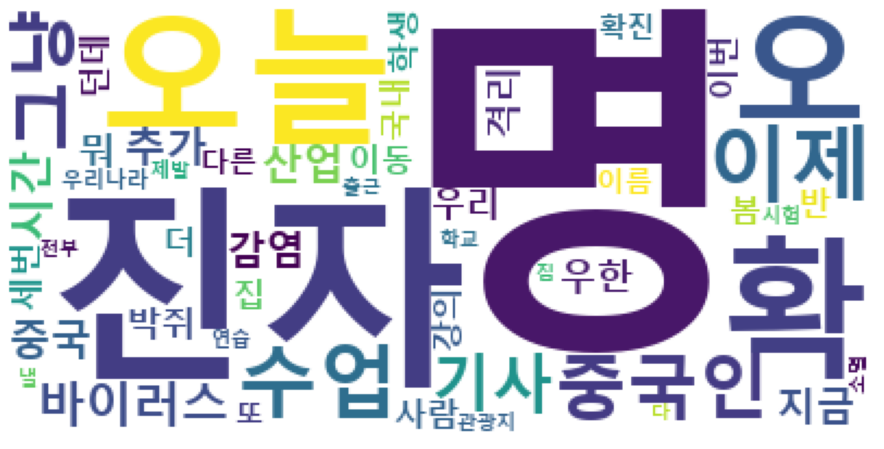

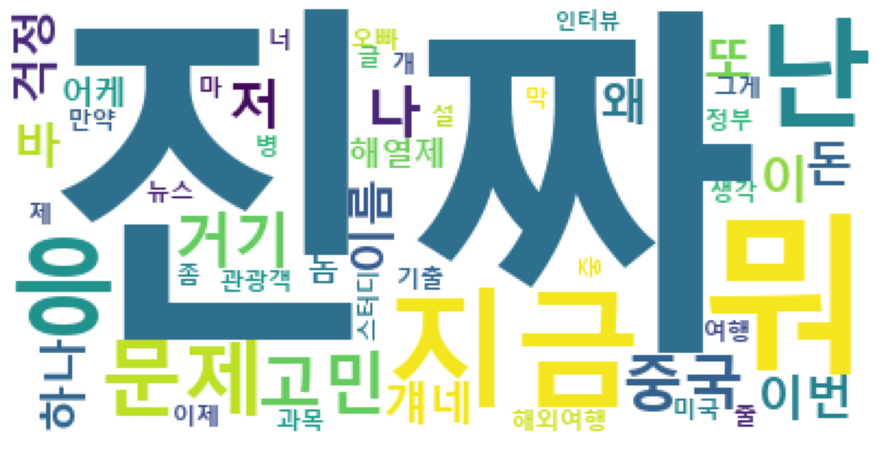

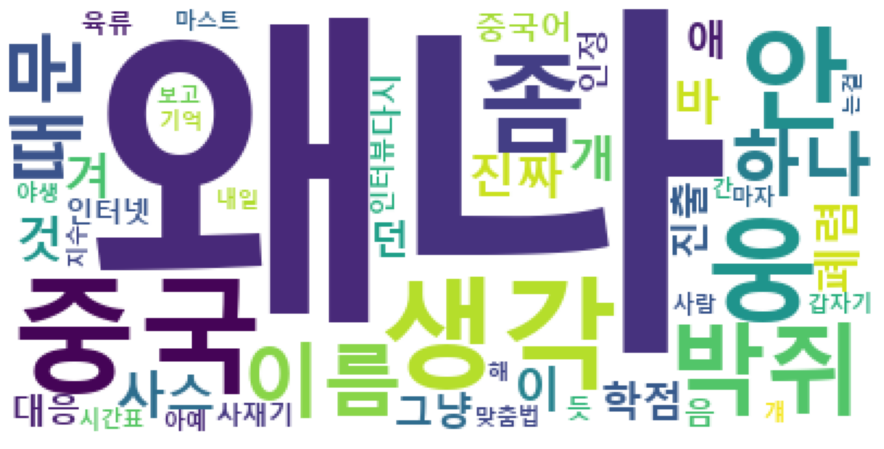

In [43]:
#ÌÜ†ÌîΩÎ≥Ñ word cloud
def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList


for i in range(1,topic_num+1):
    data_list = globals()['df_{}'.format(i)].utterance.values.tolist()
    data_word=[]
    
    for j in range(len(data_list)):
        try:
            data_word.append(okt.nouns(data_list[j]))
        except Exception as e:
            continue       
    data_word=flatten(data_word)
    data_word=[x for x in data_word if not x.isdigit()]
    
    freq=pd.Series(data_word).value_counts().head(50)
    freq=dict(freq)
    
    wordcloud = WordCloud(max_font_size=300,
                      font_path='C:\Windows\\Fonts\\malgunbd.ttf',
                      relative_scaling = 0.2,
                     background_color = 'white',
                    ).generate_from_frequencies(freq)
        
   # wordcloud = WordCloud(background_color='white', font_path = font_path).generate_from_frequencies(text) 
    
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

 #   plt.savefig("./Result/topic("+str(i)+")wordcloud.png")

# ÌÜ†ÌîΩ Î≥Ñ Ìä∏Ïúó ÌçºÏÑºÌä∏

In [26]:
lda_inform.to_csv ("./Result/lda_inform.csv", index = None)
lda_inform

FileNotFoundError: [Errno 2] No such file or directory: './Result/lda_inform.csv'

In [19]:
#df_topic_tweet.to_csv ("./Result/df_topic_tweet.csv", index = None)
df_topic_tweet

Document_No Dominant_Topic  Topic_Perc_Contrib  \
0              0              5              0.1164   
1              1              5              0.1183   
2              2              5              0.1013   
3              3              8              0.1280   
4              4              1              0.0994   
..           ...            ...                 ...   
559          559              1              0.0991   
560          560              9              0.1296   
561          561              9              0.1186   
562          562              1              0.0833   
563          563              6              0.1143   

                                    Keywords  \
0      Ïùº, Í∞êÏóºÏ¶ù, Î∞îÏù¥Îü¨Ïä§, ÏßÄÍ∏à, Ïãú, Ïõî, Ïö∞Î¶¨, Í≤É, ÎïåÎ¨∏, ÌôïÏÇ∞   
1      Ïùº, Í∞êÏóºÏ¶ù, Î∞îÏù¥Îü¨Ïä§, ÏßÄÍ∏à, Ïãú, Ïõî, Ïö∞Î¶¨, Í≤É, ÎïåÎ¨∏, ÌôïÏÇ∞   
2      Ïùº, Í∞êÏóºÏ¶ù, Î∞îÏù¥Îü¨Ïä§, ÏßÄÍ∏à, Ïãú, Ïõî, Ïö∞Î¶¨, Í≤É, ÎïåÎ¨∏, ÌôïÏÇ∞   
3     Ï∂úÏ≤ò, ÎÑ§Ïù¥Î≤Ñ, Îâ¥Ïä§, ÏÇ¨Îûå, ÎïåÎ¨∏, Î∏îÎ°úÍ∑∏, ÌïúÍµ≠, Í≤É, Ïù¥, Í±±Ï†ï   
4    Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
..                                       ...   
559  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
560   Î™Ö, ÌôïÏßÑ, Î∏îÎ°úÍ∑∏, ÌôòÏûê, Ï∂úÏ≤ò, Í±±Ï†ï, Í≤É, ÎïåÎ¨∏, Ïö∞Î¶¨, ÎßàÏä§ÌÅ¨   
561   Î™Ö, ÌôïÏßÑ, Î∏îÎ°úÍ∑∏, ÌôòÏûê, Ï∂úÏ≤ò, Í±±Ï†ï, Í≤É, ÎïåÎ¨∏, Ïö∞Î¶¨, ÎßàÏä§ÌÅ¨   
562  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
563    Îâ¥Ïä§, ÌôïÏÇ∞, ÌïúÍµ≠, ÏùºÎ≥∏, Îã§Ïùå, ÎåÄÏùë, ÎïåÎ¨∏, ÏÇ¨Îûå, Í≤É, Í±±Ï†ï   

                                                  Text  Timestamp  \
0    ÏÇ¨Ïä§Í∞Ä ÏïÑÏãúÏïÑÏóêÏÑú Ï∂úÌòÑÌïú ÌõÑ ÏÑ∏Í≥Ñ Î≥¥Í±¥ Í∏∞Íµ¨Îäî     ÎÖÑ  Ïõî   Ïùº  Ïó¨Îü¨ Ïã§ÌóòÏã§... 2019-12-04   
1    ÏÇ¨Ïä§Ïùò ÏõêÏù∏Ïù¥ ÎêòÎäî Î∞îÏù¥Îü¨Ïä§Ïù¥Îã§   ÏÇ¨Ïä§Í∞Ä ÏïÑÏãúÏïÑÏóêÏÑú Ï∂úÌòÑÌïú ÌõÑ ÏÑ∏Í≥Ñ Î≥¥Í±¥ Í∏∞Íµ¨Îäî ... 2019-12-12   
2    ÎÇ¥ÏùºÏùÄ Ïπ¥ÏÇ¨ÏΩîÎ°úÎÇòÏóê Ï∂úÎèô Ìï©ÎãàÎã§  ÎßÅÎã§Ïùò ÎùºÏù¥Î∏åÎèÑ Î≥¥Í≤å ÎêòÍ≥†  Ïß±Î©ãÏûàÎäî ÎîîÏ†úÏù¥ Î∂ÑÎì§... 2019-12-14   
3       Ïö∞Ìïú ÌèêÎ†¥  ÏÇ¨Ïä§ ÏïÑÎãå Ïã†Ï¢Ö ÏΩîÎ°úÎÇòÎ∞îÏù¥Îü¨Ïä§  Ïû†Ï†ï ÌåêÏ†ï  Ï∂úÏ≤ò         ... 2020-01-09   
4     Íµ≠Ï†ú  Ï§ëÍµ≠Ïùò Ï†ÑÏóºÎ≥ë ÏúÑÌóò Ï¶ùÍ∞Ä Ï∂îÏÑ∏     Ïã†Ï¢Ö ÏΩîÎ°úÎÇòÎ∞îÏù¥Îü¨Ïä§Î°ú Ï∂îÏ†ï      ... 2020-01-09   
..                                                 ...        ...   
559                   Î¨∏Ï†úÏù∏ Ï†ïÎ∂ÄÏùò Ïã†Ï¢ÖÏΩîÎ°úÎÇò ÎåÄÏ≤òÎ≤ï Ïö∞ÏôïÏûêÏôï Í∞àÌå°ÏßàÌå° Ïò§ÎùΩÍ∞ÄÎùΩ 2020-02-01   
560   Ïõî Ïùº Ïò§Ï†Ñ Ïãú ÌòÑÏû¨  Ï§ëÍµ≠Ïö∞ÌïúÌéòÎ†¥ ÏΩîÎ°úÎÇòÎ∞îÏù¥Îü¨Ïä§  ÌôïÏßÑÏûê       Î™Ö  ÏÇ¨ÎßùÏûê... 2020-02-01   
561                            ÏÜçÎ≥¥ Ïã†Ï¢ÖÏΩîÎ°úÎÇò Íµ≠ÎÇ¥  Î™ÖÏ∂îÍ∞Ä  Ï¥ù   Î™Ö 2020-02-01   
562        ÏïÑ Ï†úÍ∞Ä Ïù¥Î†áÍ≤å ÎààÏπòÍ∞Ä ÏóÜÏäµÎãàÎè†  „Öé„Öé ÏΩîÎ°úÎÇò Ïû†Ïû†Ìï¥ÏßÄÎ©¥ Íµ∞ÏÇ∞ Ïò§Ïã≠ÏãúÏò§  „Öé„Öé 2020-02-01   
563  Ïã†Ï¢ÖÏΩîÎ°úÎÇòÏóêÎèÑ Ï£ºÎßê ÎåÄÍ∑úÎ™® ÎèÑÏã¨ÏßëÌöå Í∞ïÌñâ  Ïö∞Î†§ Î™©ÏÜåÎ¶¨ ÎÇòÏôÄ   Îã§Ïùå Îâ¥Ïä§     ... 2020-02-01   

                                       Tweet_url      Screen_name  label  \
0         /snowcheck2/status/1202119408283316225       snowcheck2      0   
1         /snowcheck2/status/1205010308416147456       snowcheck2      0   
2            /sukyuel/status/1205849913831120897          sukyuel      1   
3      /lastromancist/status/1215221939062493185    lastromancist      0   
4            /hmk0697/status/1215196264305840129          hmk0697      0   
..                                           ...              ...    ...   
559      /DooBaeYoung/status/1223417981637513216      DooBaeYoung      0   
560      /DooBaeYoung/status/1223415559137529856      DooBaeYoung      0   
561      /DooBaeYoung/status/1223413921073123328      DooBaeYoung      1   
562  /tmlQZX1owU3sqsb/status/1223403345164943361  tmlQZX1owU3sqsb      1   
563      /tksRnfjrl46/status/1223396785550286848      tksRnfjrl46      0   

                                                 Clean  
0    [ÏÇ¨Ïä§, ÏïÑÏãúÏïÑ, Ï∂úÌò

# ÌÜ†ÌîΩ Î≥Ñ Ìä∏Ïúó Ï†ÄÏû•

In [20]:
#ÌÜ†ÌîΩÎ≥Ñ Ìä∏Ïúó Ï†ÄÏû•
for i in range(1,topic_num+1):
    globals()['df_{}'.format(i)]=df_topic_tweet.loc[df_topic_tweet.Dominant_Topic==str(i)]
    globals()['df_{}'.format(i)].sort_values('Topic_Perc_Contrib',ascending=False,inplace = True)
    globals()['df_{}'.format(i)].to_csv ("./Result/topic("+str(i)+")_tweet.csv", index = None)
    



/root/corona/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
#df_1~df_?? ÌÜ†ÌîΩ Ïàò ÍπåÏßÄ
df_1

Document_No Dominant_Topic  Topic_Perc_Contrib  \
408          408              1              0.1580   
549          549              1              0.1535   
166          166              1              0.1441   
366          366              1              0.1257   
311          311              1              0.1257   
..           ...            ...                 ...   
8              8              1              0.0833   
332          332              1              0.0833   
345          345              1              0.0833   
346          346              1              0.0833   
562          562              1              0.0833   

                                    Keywords  \
408  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
549  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
166  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
366  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
311  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
..                                       ...   
8    Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
332  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
345  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
346  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
562  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   

                                                  Text  Timestamp  \
408  ÏôÄÏö∞ Ïù¥Í±∞ Î¨¥ÏÑúÏõå ÏÇ¥Í≤†ÎÇò Ï§ëÍµ≠ Ï§ëÍµ≠ Ï§ëÍµ≠ Ï§ëÍµ≠Î™ΩÏóê ÌêÅÎãπÎπ†Ï†∏ Ìó§Îß§Îçò Î¨∏Ï©ùÏ©ùÏù¥ ÏôÑÏ†ÑÌûà ... 2020-01-31   
549  Ï§ëÍµ≠Ìñâ Ïó¨Ìñâ Í∏àÏßÄ ÌôïÏÇ∞  Ï§ëÍµ≠   ÌïòÎäòÍ∏∏ ÎßâÌûåÎã§  ÎØ∏Íµ≠ÏùÑ ÏúÑÏãúÌï¥ÏÑú   ÏÑ∏Í≥Ñ Í≥≥Í≥≥ÏóêÏÑú... 2020-02-01   
166  Ïö∞Ìïú ÏΩîÎ°úÎÇòÍ∞Ä Í∑πÏã¨ÌïòÎã§  Í∑∏Îü∞Îç∞ Ïù¥Í≤å ÏÇ¨ÎûåÍ∞Ñ Í∞ÑÏóºÏù¥ Ï§ëÏöîÌïòÏßÄÎßå Ïôú Ïö∞ÌïúÏù∏Í∞ÄÏùò ÌôòÍ≤ΩÏ†Å... 2020-01-28   
366  Ï§ëÍµ≠ Ï†ÑÏó≠Ïù¥ Ïã†Ï¢Ö ÏΩîÎ°úÎÇòÎ∞îÏù¥Îü¨Ïä§ Í∞êÏóºÏ¶ùÏúºÎ°ú Î™∏ÏÇ¥ÏùÑ ÏïìÎäî Í∞ÄÏö¥Îç∞ ÌïúÍµ≠Í∏∞ÏóÖÎì§Ïù¥ Ïã†Ï¢Ö ÏΩî... 2020-01-31   
311  Ïö∞Î¶¨ÎÇòÎùº ÏßÄÎÇúÌï¥ ÏµúÎåÄ Î¨¥Ïó≠ÌùëÏûêÍµ≠ÏùÄ ÌôçÏΩ©  ÏúÑ Ï§ëÍµ≠  ÎØ∏Íµ≠  ÏùºÎ≥∏ Ïàú         ... 2020-01-30   
..                                                 ...        ...   
8                                ÏöîÏ¶òÏùÄ ÏΩîÎ°úÎÇò ÎìúÏãúÎçîÎùº  ÌäπÏù¥Ìï¥ „Öã„Öã„Öã 2020-01-19   
332              „Öã„Öã„ÖãÏû°ÎÖÑÎëò ÏΩîÎ°úÎÇò Î¨¥ÏÑúÏõåÏÑú ÏÉàÎ≤ΩÏóêÎäî ÏïàÎèåÏïÑ Îã§ÎãàÎÑ§  „Öã„Öã„Öã ÎØ∏ÏπúÎÖÑ 2020-01-30   
345  Ï≤†ÏàòÏùò      Ï≤†ÏàòÍ∞Ä Ï£ΩÏóàÎã§ Íπ®ÎÇòÎèÑ Ï≤†ÏàòÏóêÍ≤ê ÏóÜÏùÑ   Î¨¥    Í≥µÍ∞êÍ≥º Î∞∞Î†§ÏñëÎ≥¥  ... 2020-01-30   
346                                      ÏÑú   ÏÑ§Îßà   ÏΩîÎ°úÎÇò  2020-01-30   
562        ÏïÑ Ï†úÍ∞Ä Ïù¥Î†áÍ≤å ÎààÏπòÍ∞Ä ÏóÜÏäµÎãàÎè†  „Öé„Öé ÏΩîÎ°úÎÇò Ïû†Ïû†Ìï¥ÏßÄÎ©¥ Íµ∞ÏÇ∞ Ïò§Ïã≠ÏãúÏò§  „Öé„Öé 2020-02-01   

                                       Tweet_url      Screen_name  label  \
408  /3CKcZIbFwIfqHhU/status/1223206193373429760  3CKcZIbFwIfqHhU      1   
549      /sungodcross/status/1223434684333342721      sungodcross      0   
166  /NwQCrmfXxzyim05/status/1222148132873486338  NwQCrmfXxzyim05      1   
366         /estarkkr/status/1223345464432398337         estarkkr      1   
311         /cjjh7722/status/1222832942264639488         cjjh7722      0   
..                                           ...              ...    ...   
8             /baeryo/status/1218747082846003201           baeryo      0   
332          /td65031/status/1222737042246795264          td65031      0   
345           /jckmon/status/1222701257913094144           jckmon      0   
346      /bruiseheart/status/1222701158663241730      bruiseheart      0   
562  /tmlQZX1owU3sqsb/status/1223403345164943361  tmlQZX1owU3sqsb      1   

                                                 Clean  
408  [ÏôÄÏö∞

# ÌÜ†ÌîΩ Î≥Ñ word cloud

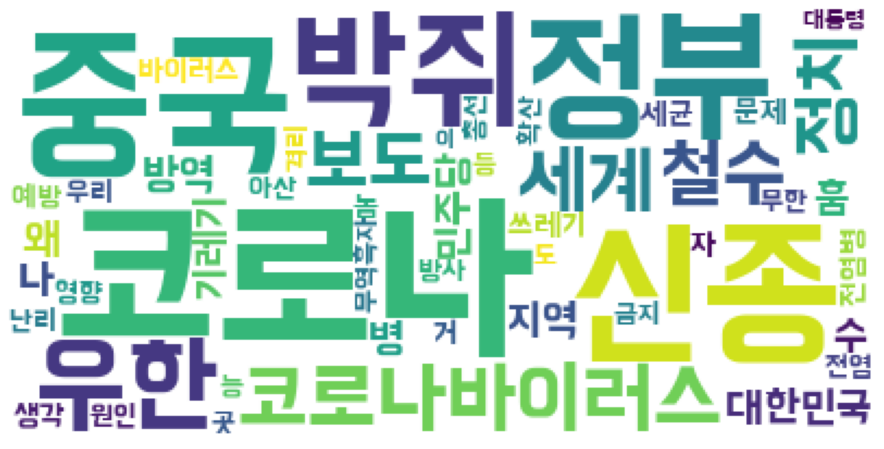

<Figure size 432x288 with 0 Axes>

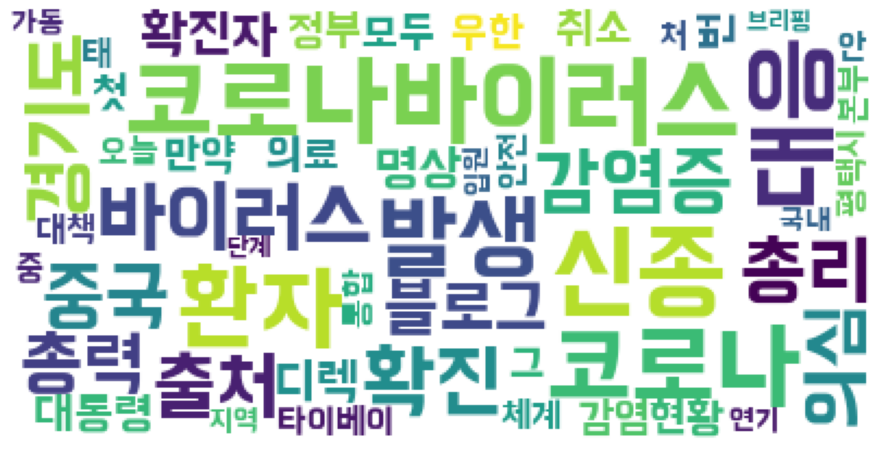

<Figure size 432x288 with 0 Axes>

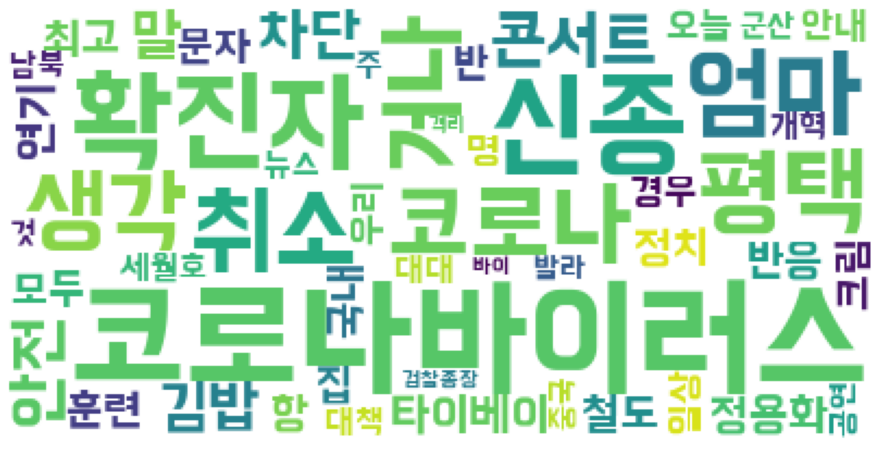

<Figure size 432x288 with 0 Axes>

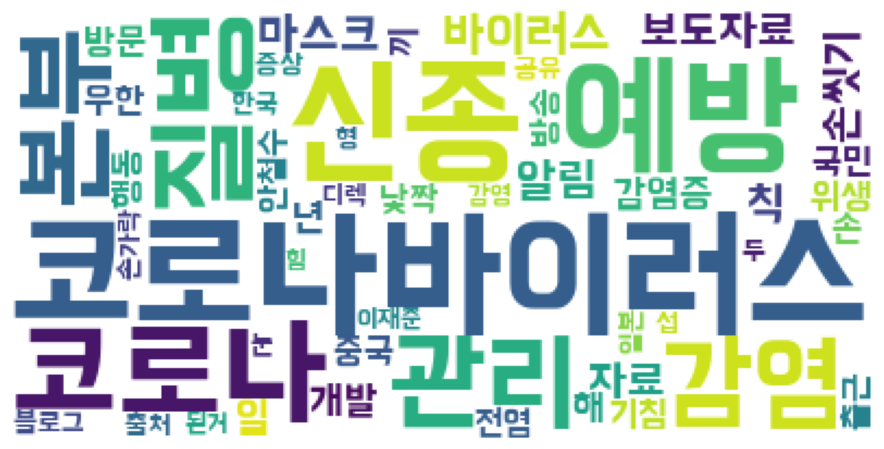

<Figure size 432x288 with 0 Axes>

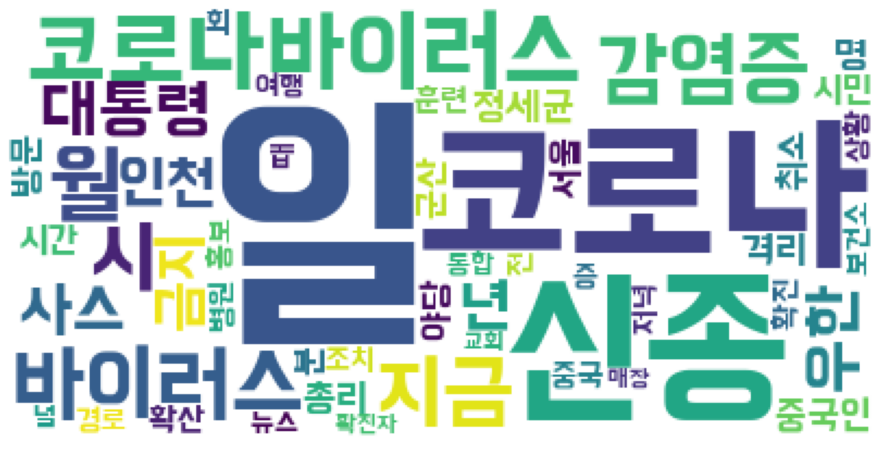

<Figure size 432x288 with 0 Axes>

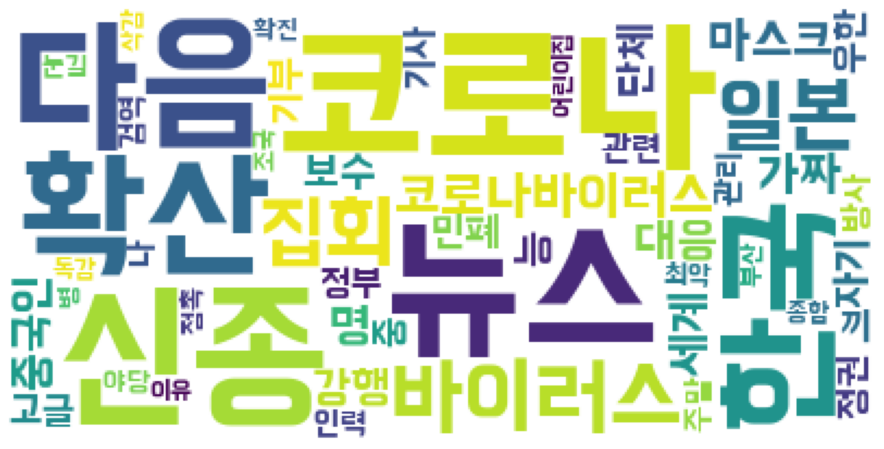

<Figure size 432x288 with 0 Axes>

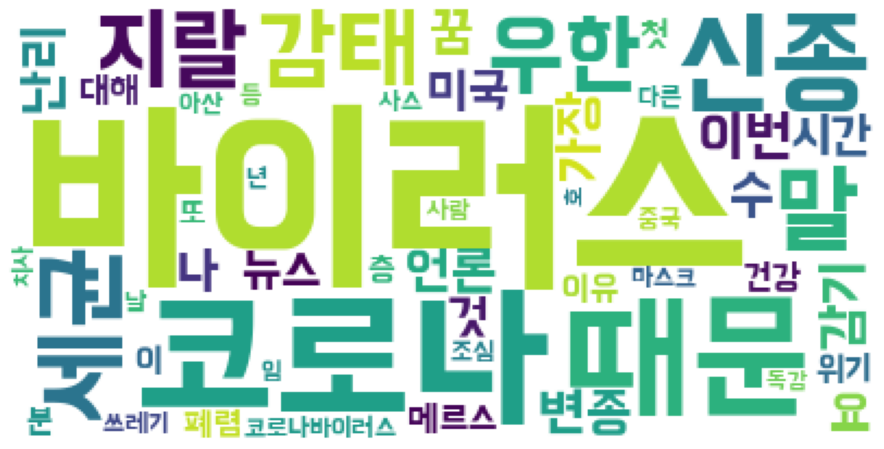

<Figure size 432x288 with 0 Axes>

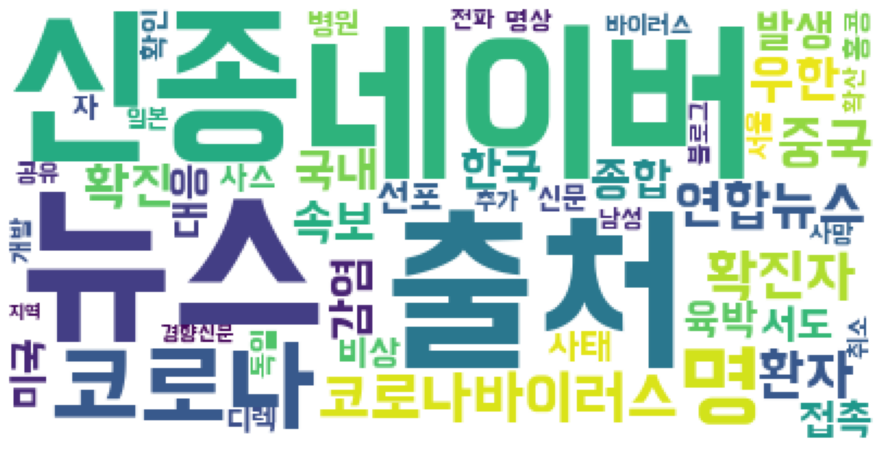

<Figure size 432x288 with 0 Axes>

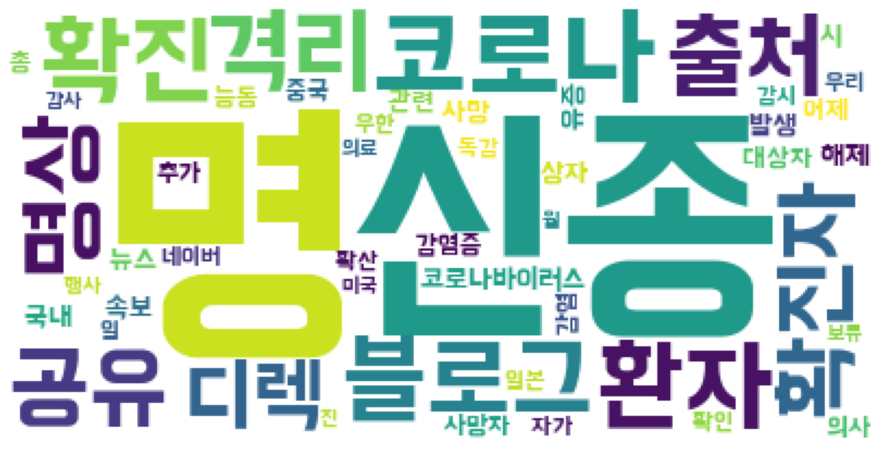

<Figure size 432x288 with 0 Axes>

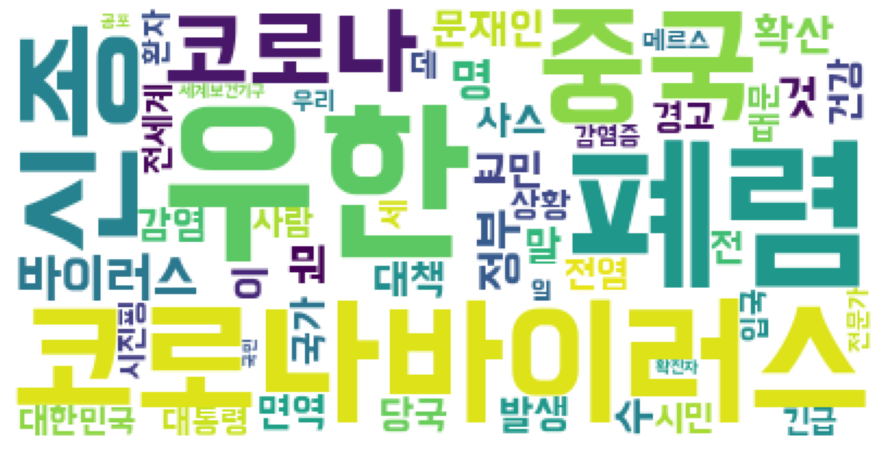

<Figure size 432x288 with 0 Axes>

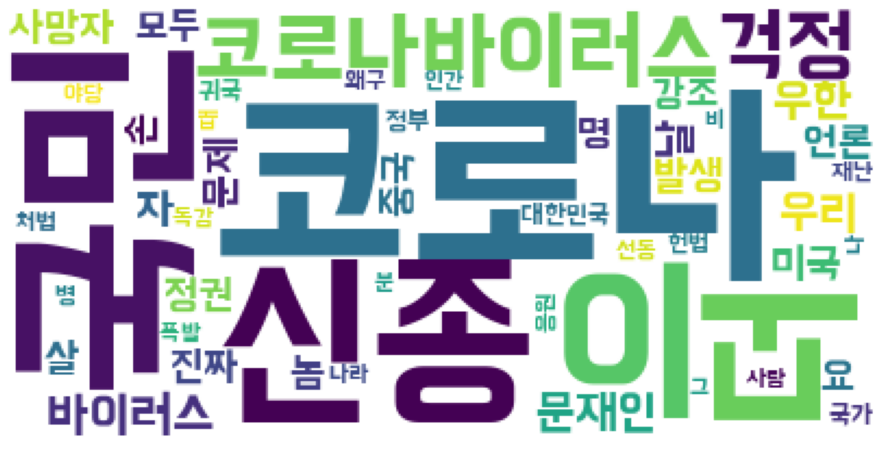

<Figure size 432x288 with 0 Axes>

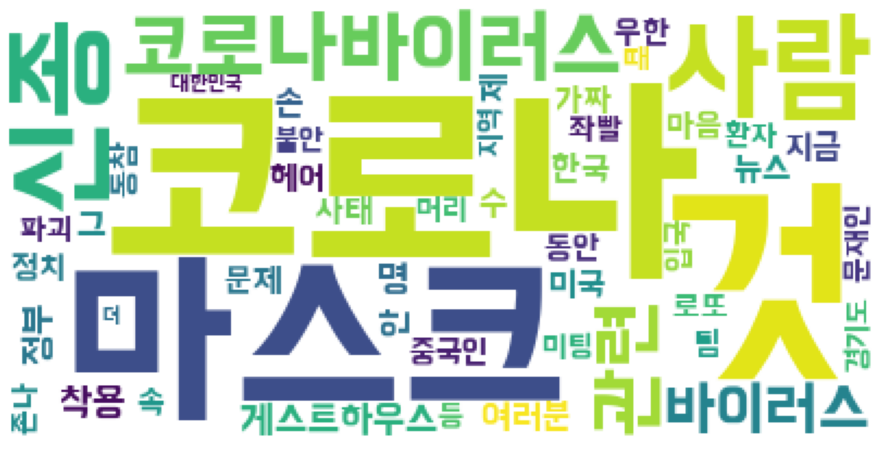

<Figure size 432x288 with 0 Axes>

In [22]:
for i in range(1,topic_num+1):
    #data_list = globals()['df_{}'.format(i)].Text.values.tolist()
    long_string = sum(globals()['df_{}'.format(i)].Clean.values,[])
    str(long_string)
    
    
    
    #data_word=[x for x in data_word if not x.isdigit()]
    
    freq=pd.Series(long_string).value_counts().head(50)
    freq=dict(freq)
    # Create a WordCloud object
    freq=dict(freq)
    
    wordcloud = WordCloud(font_path="./Font/BMHANNA_11yrs_ttf.ttf",
             relative_scaling = 0.2,
             background_color = 'white',
            ).generate_from_frequencies(freq)
    
    # Visualize the word cloud
    wordcloud.to_image()
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    plt.savefig("./Result/topic("+str(i)+")wordcloud.png")


# ÌÜ†ÌîΩ Î≥Ñ Í∏çÎ∂ÄÏ†ï ÎπÑÏú®

In [23]:

for i in range(1,topic_num+1):
    globals()['df_{}_pn'.format(i)]=globals()['df_{}'.format(i)].label.value_counts(normalize=True) * 100
    globals()['df_{}_pn'.format(i)]
  #  globals()['df_{}_pn'.format(i)].to_csv ("./Result/topic_tweet(topic"+str(i)+")posneg.csv", index = None)
    



In [24]:
#df_1_pn~df_?? ÌÜ†ÌîΩ Ïàò ÍπåÏßÄ
df_1_pn


0    71.604938
1    28.395062
Name: label, dtype: float64

# ÌÜ†ÌîΩ Î≥Ñ Í∏çÏ†ï Î∂ÄÏ†ï Ìä∏Ïúó 

In [25]:
for i in range(1, topic_num+1):
    globals()['df_{}_positive'.format(i)]=globals()['df_{}'.format(i)][globals()['df_{}'.format(i)]['label'] == 1]
    globals()['df_{}_negative'.format(i)]=globals()['df_{}'.format(i)][globals()['df_{}'.format(i)]['label'] == 0]
    globals()['df_{}_positive'.format(i)].to_csv ("./Result/topic("+str(i)+")_tweet_positive.csv", index = None)
    globals()['df_{}_negative'.format(i)].to_csv ("./Result/topic("+str(i)+")_tweet_negative.csv", index = None)

In [26]:
df_1_positive

Document_No Dominant_Topic  Topic_Perc_Contrib  \
408          408              1              0.1580   
166          166              1              0.1441   
366          366              1              0.1257   
179          179              1              0.1101   
328          328              1              0.1013   
350          350              1              0.0994   
304          304              1              0.0975   
24            24              1              0.0957   
390          390              1              0.0833   
542          542              1              0.0833   
517          517              1              0.0833   
374          374              1              0.0833   
414          414              1              0.0833   
545          545              1              0.0833   
535          535              1              0.0833   
60            60              1              0.0833   
195          195              1              0.0833   
227          227              1              0.0833   
267          267              1              0.0833   
286          286              1              0.0833   
298          298              1              0.0833   
310          310              1              0.0833   
562          562              1              0.0833   

                                    Keywords  \
408  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
166  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
366  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
179  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
328  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
350  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
304  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
24   Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
390  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
542  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
517  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
374  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
414  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
545  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
535  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
60   Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
195  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
227  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
267  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
286  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
298  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
310  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
562  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   

                                                  Text  Timestamp  \
408  ÏôÄÏö∞ Ïù¥Í±∞ Î¨¥ÏÑúÏõå ÏÇ¥Í≤†ÎÇò Ï§ëÍµ≠ Ï§ëÍµ≠ Ï§ëÍµ≠ Ï§ëÍµ≠Î™ΩÏóê ÌêÅÎãπÎπ†Ï†∏ Ìó§Îß§Îçò Î¨∏Ï©ùÏ©ùÏù¥ ÏôÑÏ†ÑÌûà ... 2020-01-31   
166  Ïö∞Ìïú ÏΩîÎ°úÎÇòÍ∞Ä Í∑πÏã¨ÌïòÎã§  Í∑∏Îü∞Îç∞ Ïù¥Í≤å ÏÇ¨ÎûåÍ∞Ñ Í∞ÑÏóºÏù¥ Ï§ëÏöîÌïòÏßÄÎßå Ïôú Ïö∞ÌïúÏù∏Í∞ÄÏùò ÌôòÍ≤ΩÏ†Å... 2020-01-28   
366  Ï§ëÍµ≠ Ï†ÑÏó≠Ïù¥ Ïã†Ï¢Ö ÏΩîÎ°úÎÇòÎ∞îÏù¥Îü¨Ïä§ Í∞êÏóºÏ¶ùÏúºÎ°ú Î™∏ÏÇ¥ÏùÑ ÏïìÎäî Í∞ÄÏö¥Îç∞ ÌïúÍµ≠Í∏∞ÏóÖÎì§Ïù¥ Ïã†Ï¢Ö ÏΩî... 2020-01-31   
179  Ï†ÑÏóºÎ≥ë ÏòàÎ∞©ÏùÑ ÏúÑÌï¥ÏÑú ÏàòÍ≥†ÌïòÏãúÎäî Î™®Îì† Î∂ÑÎì§Íªò   Í≤ΩÏùòÎ•º

In [27]:
df_1_negative

Document_No Dominant_Topic  Topic_Perc_Contrib  \
549          549              1              0.1535   
311          311              1              0.1257   
534          534              1              0.1142   
456          456              1              0.1101   
474          474              1              0.1101   
206          206              1              0.1082   
537          537              1              0.1063   
42            42              1              0.1060   
224          224              1              0.1019   
280          280              1              0.1013   
133          133              1              0.1013   
495          495              1              0.1013   
467          467              1              0.1013   
222          222              1              0.0994   
341          341              1              0.0994   
134          134              1              0.0994   
4              4              1              0.0994   
512          512              1              0.0994   
559          559              1              0.0991   
276          276              1              0.0975   
405          405              1              0.0975   
74            74              1              0.0972   
424          424              1              0.0957   
400          400              1              0.0833   
375          375              1              0.0833   
530          530              1              0.0833   
377          377              1              0.0833   
393          393              1              0.0833   
477          477              1              0.0833   
401          401              1              0.0833   
415          415              1              0.0833   
438          438              1              0.0833   
447          447              1              0.0833   
546          546              1              0.0833   
327          327              1              0.0833   
372          372              1              0.0833   
225          225              1              0.0833   
72            72              1              0.0833   
87            87              1              0.0833   
114          114              1              0.0833   
130          130              1              0.0833   
146          146              1              0.0833   
159          159              1              0.0833   
167          167              1              0.0833   
176          176              1              0.0833   
189          189              1              0.0833   
191          191              1              0.0833   
220          220              1              0.0833   
360          360              1              0.0833   
269          269              1              0.0833   
272          272              1              0.0833   
299          299              1              0.0833   
303          303              1              0.0833   
319          319              1              0.0833   
8              8              1              0.0833   
332          332              1              0.0833   
345          345              1              0.0833   
346          346              1              0.0833   

                                    Keywords  \
549  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
311  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
534  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
456  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
474  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
206  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
537  Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏, Í≤É   
42   Ï§ëÍµ≠, Ï†ïÎ∂Ä, ÎåÄÏùë, ÏÇ¨Îûå, ÎïåÎ¨∏, ÎßàÏä§ÌÅ¨, ÌïúÍµ≠, ÌôïÏÇ∞, Î∏îÎ°úÍ∑∏

In [28]:
Data= pd.read_csv('./KOREA_Tweet_Data.csv', encoding="utf-8")